In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Data/Constraint_Val.csv
/content/drive/MyDrive/Data/Constraint_Test.csv
/content/drive/MyDrive/Data/Constraint_Train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/COVID/original-data/Constraint_Train.csv')
valid= pd.read_csv('/content/drive/MyDrive/COVID/original-data/Constraint_Val.csv')
test=pd.read_csv('/content/drive/MyDrive/COVID/original-data/Constraint_Test.csv')

**PRE PROCESSING OF DATA**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Constraint_Train.csv')
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
test.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [ ]:
news_data = pd.concat([train,valid,test])

In [ ]:
news_data.shape

(10700, 3)

In [ ]:
news_data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
news_data.drop(columns='id', axis=1)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
2135,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [ ]:

# counting the number of missing values in the dataset
news_data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_data = news_data.fillna('')

In [ ]:

# checking the number of missing values in the dataset
news_data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [ ]:
# merging the author name and news title
#news_data['content'] = news_data['author']+' '+news_data['title']

In [ ]:

#print(news_data['content'])

In [ ]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='label', axis=1)
## Get the Dependent features
Y = news_data['label']

In [ ]:
Y.value_counts()

real    5600
fake    5100
Name: label, dtype: int64

In [ ]:
X.shape
#X.todense()

(10700, 2)

In [ ]:
Y.shape

(10700,)

In [ ]:
print(X)
print(Y)

        id                                              tweet
0        1  The CDC currently reports 99031 deaths. In gen...
1        2  States reported 1121 deaths a small rise from ...
2        3  Politically Correct Woman (Almost) Uses Pandem...
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...
4        5  Populous states can generate large case counts...
...    ...                                                ...
2135  2136  #CoronaVirusUpdates: State-wise details of Tot...
2136  2137  Tonight 12(midnight) onwards Disaster Manageme...
2137  2138  296 new cases of #COVID19Nigeria; Plateau-85 E...
2138  2139  RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...
2139  2140  More than half of pregnant women recently admi...

[10700 rows x 2 columns]
0       real
1       real
2       fake
3       real
4       real
        ... 
2135    real
2136    fake
2137    real
2138    real
2139    real
Name: label, Length: 10700, dtype: object


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
news_data['tweet'] = news_data['tweet'].apply(stemming)

In [ ]:
print(news_data['tweet'])

0       cdc current report death gener discrep death c...
1       state report death small rise last tuesday sou...
2       polit correct woman almost use pandem excus re...
3       indiafightscorona covid test laboratori india ...
4       popul state gener larg case count look new cas...
                              ...                        
2135    coronavirusupd state wise detail total confirm...
2136    tonight midnight onward disast manag act imple...
2137    new case covid nigeria plateau enugu oyo lago ...
2138    rt cdcemerg dyk cdcgov one stop shop covid res...
2139    half pregnant women recent admit uk hospit cov...
Name: tweet, Length: 10700, dtype: object


In [ ]:
#separating the data and label
X = news_data['tweet'].values
Y = news_data['label'].values

In [ ]:
print(X)

['cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today'
 'state report death small rise last tuesday southern state report death http co yasgrtt ux'
 'polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil'
 ...
 'new case covid nigeria plateau enugu oyo lago river fct kaduna bauchi delta ekiti akwa ibom ebonyi kwara ogun osun gomb niger confirm discharg death http co vlnb mw'
 'rt cdcemerg dyk cdcgov one stop shop covid resourc section commun peopl age find'
 'half pregnant women recent admit uk hospit covid infect black ethnic minor group bmj studi find http co rypbgsnael']


In [ ]:
print(Y)

['real' 'real' 'fake' ... 'real' 'real' 'real']


In [ ]:
Y.shape

(10700,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 16556)	0.2470202852189081
  (0, 16529)	0.14929839178862414
  (0, 15576)	0.2315825656537546
  (0, 15410)	0.2325769851683057
  (0, 15262)	0.253318139296502
  (0, 14357)	0.29733212949732624
  (0, 13965)	0.12117721936976542
  (0, 12422)	0.12884961170951034
  (0, 5996)	0.21943320876530997
  (0, 5014)	0.3764724280886784
  (0, 3881)	0.333321713798755
  (0, 3821)	0.2156569208972049
  (0, 3543)	0.3914981943373775
  (0, 3314)	0.18826853523329973
  (0, 3079)	0.23464469797856227
  (0, 2227)	0.18395137356543878
  (1, 19080)	0.42997375506388885
  (1, 17513)	0.39887967086077475
  (1, 16804)	0.3070216420330762
  (1, 15590)	0.27578976245479364
  (1, 15415)	0.36250192435459905
  (1, 15262)	0.2893177387042485
  (1, 14174)	0.23599627280620866
  (1, 13965)	0.27679596248331756
  (1, 9241)	0.195792345764822
  :	:
  (10698, 4317)	0.33803733763254556
  (10698, 3108)	0.07801037643806254
  (10698, 2825)	0.21197433376394884
  (10698, 2234)	0.32487397025674897
  (10698, 2230)	0.3309839192095568
  (10698, 268

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9663551401869159


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.926791277258567


In [ ]:

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')







In [ ]:

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:

#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.903
Confusion matrix, without normalization


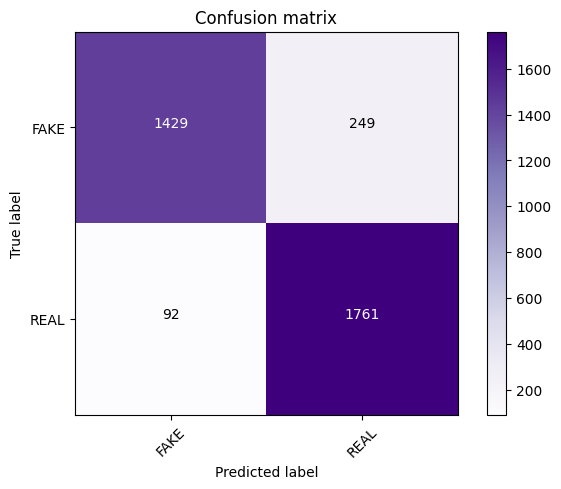

In [ ]:

from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.941
Confusion matrix, without normalization


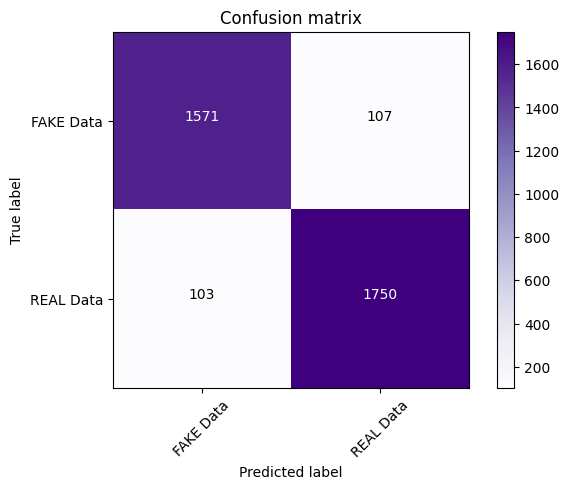

In [ ]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

**BUILDING A PREDICTIVE SYSTEM:**

In [ ]:
X1_new = X1_test[0]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['fake']
The news is Fake


In [ ]:

print(Y1_test[0])

fake


In [ ]:
X2_new = X2_test[0]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['fake']
The news is Fake


In [ ]:
print(Y2_test[0])

fake


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

        fake       0.92      0.93      0.92      1530
        real       0.94      0.92      0.93      1680

    accuracy                           0.93      3210
   macro avg       0.93      0.93      0.93      3210
weighted avg       0.93      0.93      0.93      3210



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction1))

              precision    recall  f1-score   support

        fake       0.94      0.85      0.89      1678
        real       0.88      0.95      0.91      1853

    accuracy                           0.90      3531
   macro avg       0.91      0.90      0.90      3531
weighted avg       0.91      0.90      0.90      3531



In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y2_test,prediction2))

              precision    recall  f1-score   support

        fake       0.94      0.94      0.94      1678
        real       0.94      0.94      0.94      1853

    accuracy                           0.94      3531
   macro avg       0.94      0.94      0.94      3531
weighted avg       0.94      0.94      0.94      3531



In [ ]:
print("Successfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier ")

Successfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier 


In [ ]:
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(news_data.tweet, news_data.label, test_size = 0.25)
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [ ]:

model = MultinomialNB()
model.fit(X_train_count, Y_train)
MultinomialNB()
X_test_count = v.transform(X_test)
model.score(X_test_count,Y_test)

0.9110280373831776

In [ ]:


Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(news_data['tweet'],news_data['label'],test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(news_data['tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y))

SVM Accuracy Score ->  0.942367601246106


In [ ]:
k_folds = model_selection.KFold(n_splits=20,shuffle=True, random_state=20)

num_estimators = [20, 40, 60,80,100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i)
    results = cross_val_score(ada_boost, X_train_count, Y_train, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.8569527673353928
Results for 40 estimators:
0.8807533405292738
Results for 60 estimators:
0.8928381781863747
Results for 80 estimators:
0.9031807918015904
Results for 100 estimators:
0.9090371087207355


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = LogisticRegression(random_state=123, solver='newton-cg')
clf3 = DecisionTreeClassifier(random_state=123, max_depth=2)


In [ ]:


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X=X.toarray()


print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, Y,
                                              cv=5,
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))



5-fold cross validation:

Accuracy: 0.83 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.74 (+/- 0.01) [Naive Bayes]


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [ ]:

from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
#X=X.toarray()

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, Y,
                                              cv=5,
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.74 (+/- 0.01) [Naive Bayes]
Accuracy: 0.90 (+/- 0.01) [Ensemble]


In [ ]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:

#X=X.toarray()

In [ ]:
from mlxtend.feature_selection import ColumnSelector


col_sel = ColumnSelector(cols=[0, 2])

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3],
                              voting='soft')
eclf.fit(X, Y).predict(X[[1, 51, 149]])

array(['real', 'real', 'fake'], dtype=object)

In [ ]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression



pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2])

eclf.fit(X, Y)

EnsembleVoteClassifier(clfs=[Pipeline(steps=[('columnselector',
                                              ColumnSelector(cols=(0, 2))),
                                             ('logisticregression',
                                              LogisticRegression())]),
                             Pipeline(steps=[('columnselector',
                                              ColumnSelector(cols=(1, 2, 3))),
                                             ('logisticregression',
                                              LogisticRegression())])])

In [ ]:

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import mnist_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.5, shuffle=True, random_state=1
)

clf1 = GaussianNB()
clf2 = LogisticRegression(random_state=123, solver='newton-cg')
clf3 = DecisionTreeClassifier(random_state=123, max_depth=2)

clf1.fit(X_train[500:1000], y_train[500:1000])
clf2.fit(X_train[750:1250], y_train[750:1250])
clf3.fit(X_train[1250:2000], y_train[1250:2000]);

In [ ]:
eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="soft",  # the same would also work with "hard" voting
    weights=(1, 1, 1),

)
eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

0.9069158878504673

In [ ]:

eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="hard",  # the same would also work with "hard" voting
    weights=(1, 1, 1),

)
eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

0.9024299065420561

In [ ]:
from scipy.optimize import minimize


def function_to_minimize(weights, fitted_clfs):

    w1, w2 = weights  # these are the new weights!

    newclf = EnsembleVoteClassifier(
        voting="soft",

        clfs=fitted_clfs,
        weights=(w1, w2, 1.),  # use the new weights
    )

    newclf.fit(X_train, y_train)
    score = newclf.score(X_val, y_val)

    # change accuracy to error so that smaller is better
    score_to_minimize = 1 - score

    return score_to_minimize

In [ ]:
init_weights = [1., 1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((clf1, clf2, clf3),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

In [ ]:
print(results)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.08560747663551405
             x: [ 8.750e-01  1.106e+00]
           nit: 22
          nfev: 59
 final_simplex: (array([[ 8.750e-01,  1.106e+00],
                       [ 8.750e-01,  1.106e+00],
                       [ 8.750e-01,  1.106e+00]]), array([ 8.561e-02,  8.561e-02,  8.561e-02]))


In [ ]:
solution = results["x"]
print(solution)


[0.875   1.10625]


In [ ]:
eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="soft",
    weights=(solution[0], solution[1], 1),

)

eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

0.914392523364486

accuracy:   0.914
Confusion matrix, without normalization


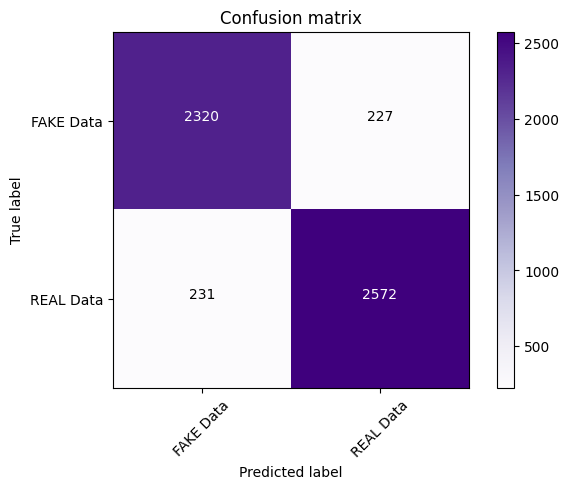

In [ ]:
eclf.fit(X_train, y_train)
prediction3 = eclf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction3)
print("accuracy:   %0.3f" % score)
cm3 = metrics.confusion_matrix(y_val, prediction3)
plot_confusion_matrix(cm3, classes=['FAKE Data', 'REAL Data'])

In [ ]:
eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="hard",
    weights=(solution[0], solution[1], 1),

)

eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

0.9024299065420561

accuracy:   0.902
Confusion matrix, without normalization


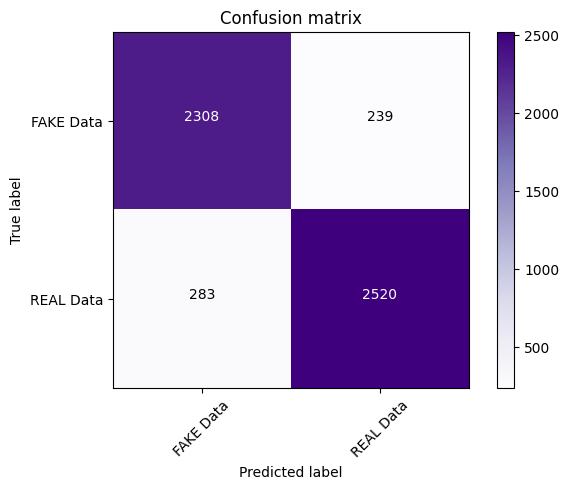

In [ ]:
eclf.fit(X_train, y_train)
prediction3 = eclf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction3)
print("accuracy:   %0.3f" % score)
cm3 = metrics.confusion_matrix(y_val, prediction3)
plot_confusion_matrix(cm3, classes=['FAKE Data', 'REAL Data'])